In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import logging
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
from sklearn.model_selection import GridSearchCV


In [2]:
# Create a logger object
logger = logging.getLogger('Insurance Premium Prediction Log')

# Set the logging level
logger.setLevel(logging.DEBUG)

# Create a file handler and set the logging level
file_handler = logging.FileHandler('insurance_code.log')
file_handler.setLevel(logging.DEBUG)

# Create a log formatter
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')

# Add the formatter to the file handler
file_handler.setFormatter(formatter)

# Add the file handler to the logger
logger.addHandler(file_handler)

## Load the data

In [3]:
df = pd.read_csv('insurance.csv')
df

logger.info(msg='Data Loaded Succesfully')

INFO:Insurance Premium Prediction Log:Data Loaded Succesfully


In [4]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [6]:
df.shape

(1338, 7)

In [7]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [9]:
df.corr()

<ipython-input-9-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


## Objective
### Model to predict Insurance Premium

## EDA

### Univariate

In [10]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


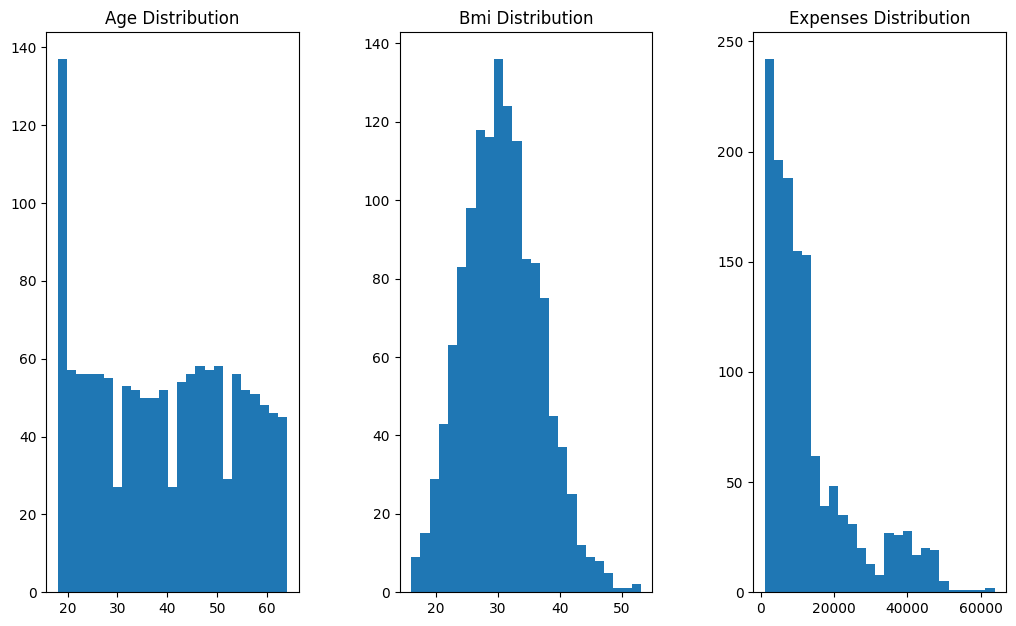

In [11]:
# Univariate Plots
fig = plt.figure(figsize=(12, 7))

plt.subplot(1,3,1)
plt.hist(df.age,bins=25)
plt.title('Age Distribution')

plt.subplot(1,3,2)
plt.hist(df.bmi,bins=25)
plt.title('Bmi Distribution')


plt.subplot(1,3,3)
plt.hist(df.expenses,bins=25)
plt.title('Expenses Distribution')


plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.show()

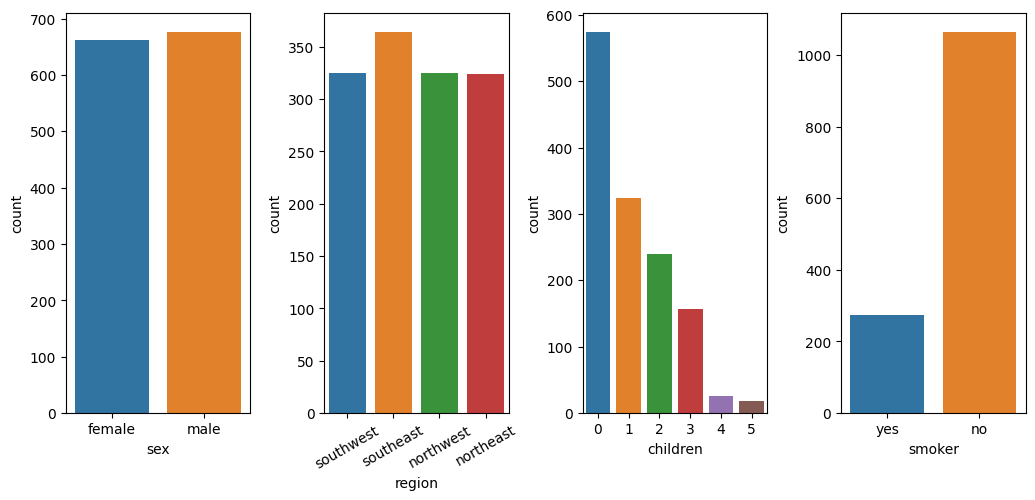

In [12]:
fig = plt.figure(figsize=(8, 5))

plt.subplot(1,4,1)
sns.countplot(data=df,x='sex')

plt.subplot(1,4,2)
sns.countplot(data=df,x='region')
plt.xticks(rotation=30)

plt.subplot(1,4,3)
sns.countplot(data=df,x='children')

plt.subplot(1,4,4)
sns.countplot(data=df,x='smoker')

plt.subplots_adjust(left=0,
                    bottom=0.1,
                    right=1.2,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.show()

##### Univariate Report

* The Age is spread across the range of 18 to 65 with the majority between age 18 to 20
* The Expenses is left skewed but we can't normalize it neither can we transform it since its our target variable
* The bmi column is normally distributed
* The range between male and female isn't that much
* Majority of the people have no children
* Most are non smoker
* Its also visible from the second plot in figure 2 that most of them are from the south east region

In [13]:
logger.info(msg='Univariate Analysis Completed ')

INFO:Insurance Premium Prediction Log:Univariate Analysis Completed 


### Bivariate

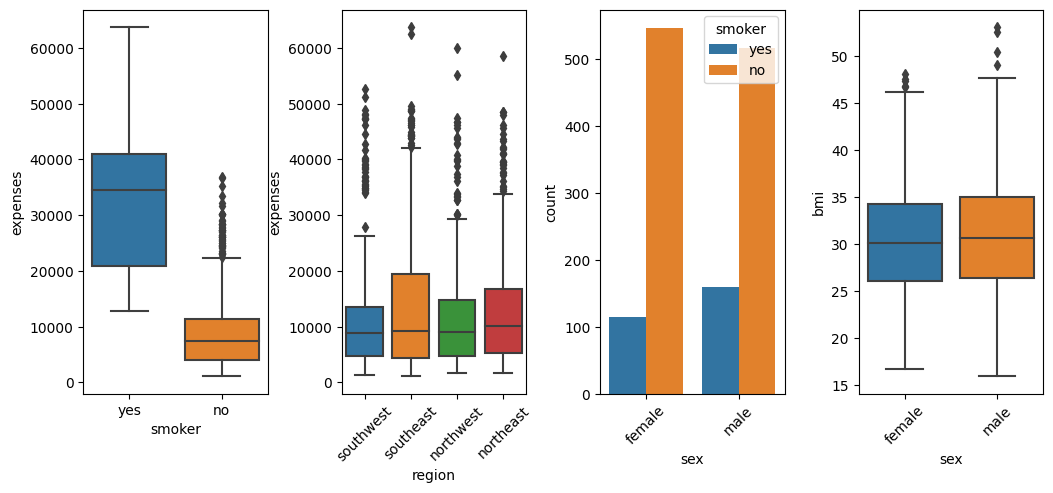

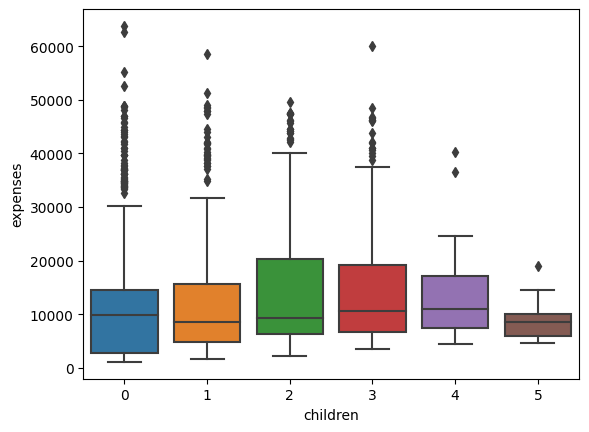

In [14]:
plt.subplot(1,4,1)
sns.boxplot(data=df,x='smoker',y='expenses')

plt.subplot(1,4,2)
sns.boxplot(data=df,x='region',y='expenses')
plt.xticks(rotation=45)

plt.subplot(1,4,3)
sns.countplot(data=df,x='sex',hue='smoker')
plt.xticks(rotation=45)

plt.subplot(1,4,4)
sns.boxplot(data=df,x='sex',y='bmi')
plt.xticks(rotation=45)

plt.subplots_adjust(left=0,
                    bottom=0.1,
                    right=1.5,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.show()

sns.boxplot(data=df,x='children',y='expenses')
plt.show()



In [15]:
df.groupby('children')['expenses'].mean()

children
0    12365.975767
1    12731.171821
2    15073.564000
3    15355.318535
4    13850.656800
5     8786.035556
Name: expenses, dtype: float64

##### Bivariate Report

* Base on the boxplot it's obvious that smokers spend more on health than non smokers
* The Males tends to smoke more than the females
* On Average the expenses is same no matter the region
* Also the Bmi is same on average for each sex
* The amount of expenses seems to be increasing as the number of children increases but tends to fall after 3 children

In [16]:
logger.info(msg='Bivariate Visualization completed Succesfully')

INFO:Insurance Premium Prediction Log:Bivariate Visualization completed Succesfully


### Multivariate

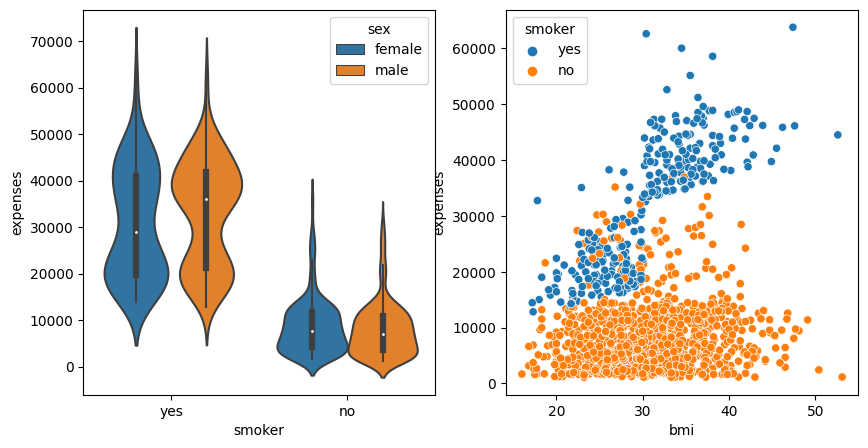

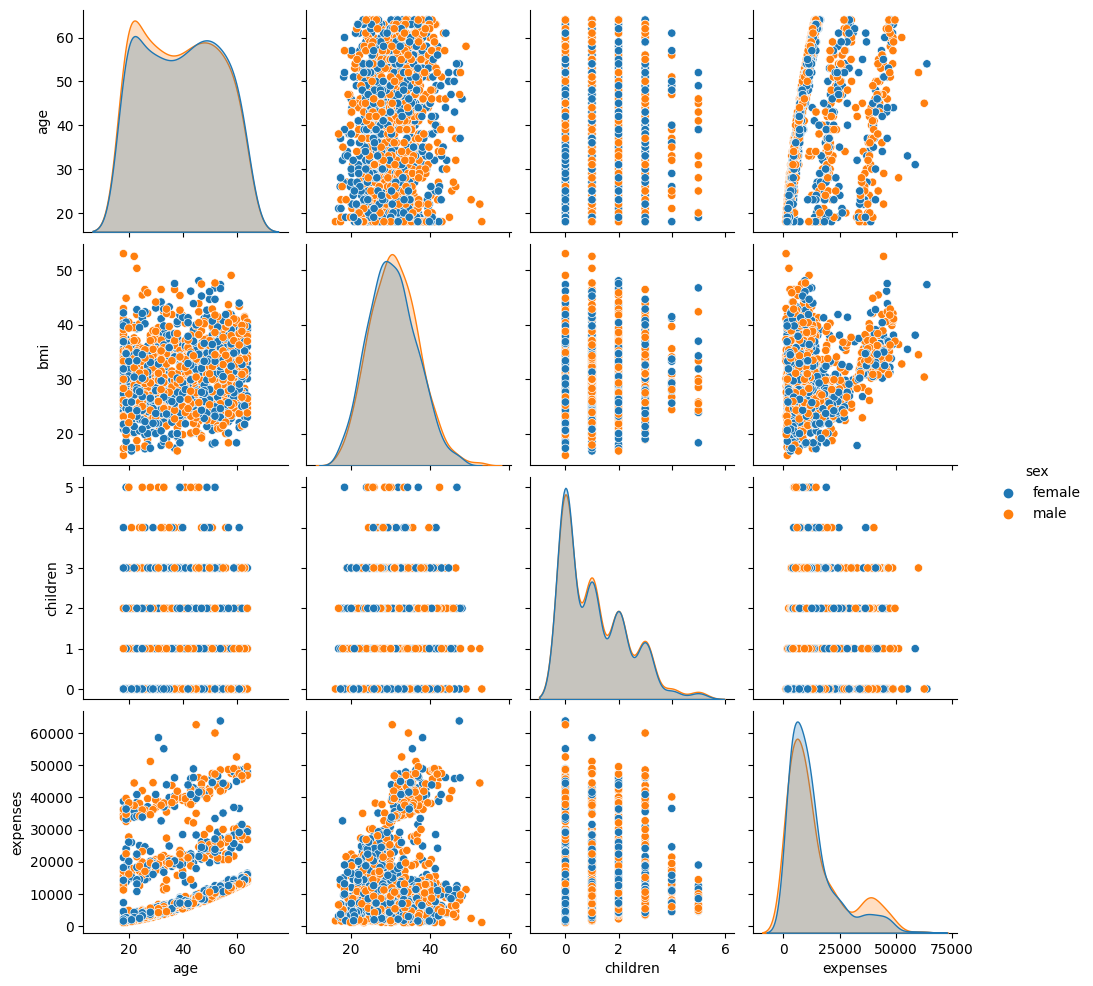

In [17]:
fig = plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.violinplot(data=df,x='smoker',y='expenses',hue='sex')

plt.subplot(1,2,2)
sns.scatterplot(data=df,x='bmi',y='expenses',hue='smoker')
plt.show()

#PairPlot
sns.pairplot(df, hue='sex')
plt.show()

##### Multivariate Report

* Male that smoke spends more than females that smoke as shown by the violin plot
* Base on the PairPlot the higher the more the BMI increase the more the Expenses increases

In [18]:
logger.info(msg='MultiVariate visualization completed succesfully')

INFO:Insurance Premium Prediction Log:MultiVariate visualization completed succesfully


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Preprocessing

####Split Data

In [28]:
y = df.expenses
X = df.drop('expenses', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=3)
logger.info(msg='Data Splitting completed succesfully')

INFO:Insurance Premium Prediction Log:Data Splitting completed succesfully


### Encoding

In [31]:
#Performing One Hot Encoding
onehot_encoding_categorical_columns = ['sex', 'smoker']

X_train = pd.get_dummies(X_train, columns = onehot_encoding_categorical_columns,drop_first=True)
X_test = pd.get_dummies(X_test, columns = onehot_encoding_categorical_columns,drop_first=True)

In [32]:
encoder = LabelEncoder()
X_train['region'] = encoder.fit_transform(X_train['region'])
X_test['region'] = encoder.transform(X_test['region'])


In [35]:
logger.info(msg='Encoding completed succesfully')

INFO:Insurance Premium Prediction Log:Encoding completed succesfully


In [36]:
X_train.head()

,age,bmi,children,region,sex_male,smoker_yes
522,51,33.9,0,0,0,0
849,55,32.8,0,1,1,0
600,18,39.2,0,2,0,0
314,27,31.4,0,3,0,1
759,18,38.2,0,2,1,1


#### Feature Scaling

In [37]:
#Feature Scaling
columns_to_scale = ['age','bmi','children','region','sex_male','smoker_yes']
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=columns_to_scale)
X_test = pd.DataFrame(scaler.transform(X_test),columns=columns_to_scale)


logger.info(msg='Scaling completed succesfully')

INFO:Insurance Premium Prediction Log:Scaling completed succesfully


In [38]:
X_train.head()

,age,bmi,children,region,sex_male,smoker_yes
0,0.839423,0.528835,-0.914745,-1.375184,-1.010741,-0.508001
1,1.125418,0.347707,-0.914745,-0.471271,0.989373,-0.508001
2,-1.520036,1.401542,-0.914745,0.432642,-1.010741,-0.508001
3,-0.876547,0.117181,-0.914745,1.336555,-1.010741,1.968502
4,-1.520036,1.236880,-0.914745,0.432642,0.989373,1.968502


<Axes: ylabel='Frequency'>

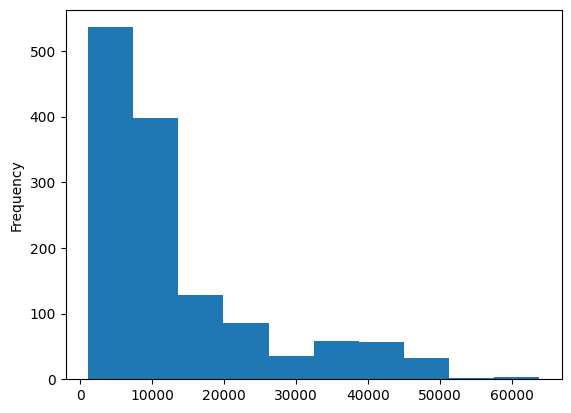

In [24]:
df.expenses.plot(kind='hist')

## Modeling

#### Random Forest Regressor, XGBRegressor, Linear Regression

In [44]:
# Creating and fitting the models
random_forest = RandomForestRegressor()
xgboost = XGBRegressor()
linear_regression = LinearRegression()

random_forest.fit(X_train, y_train)
xgboost.fit(X_train, y_train)
linear_regression.fit(X_train, y_train)

# Predicting with models
rf_predictions = random_forest.predict(X_test)
xgb_predictions = xgboost.predict(X_test)
lr_predictions = linear_regression.predict(X_test)

logger.info(msg='Model Build Successfully completed succesfully')

INFO:Insurance Premium Prediction Log:Model Build Successfully completed succesfully


## Evaluation

In [45]:
# Evaluate the models
rf_r2 = r2_score(y_test, rf_predictions)
rf_rmse = sqrt(mean_squared_error(y_test, rf_predictions))

xgb_r2 = r2_score(y_test, xgb_predictions)
xgb_rmse = sqrt(mean_squared_error(y_test, xgb_predictions))

lr_r2 = r2_score(y_test, lr_predictions)
lr_rmse = sqrt(mean_squared_error(y_test, lr_predictions))

# Print the evaluation results
print("Random Forest Regressor:")
print("R2 Score: {:.4f}".format(rf_r2))
print("RMSE: {:.4f}".format(rf_rmse))
print()

print("XGBoost Regressor:")
print("R2 Score: {:.4f}".format(xgb_r2))
print("RMSE: {:.4f}".format(xgb_rmse))
print()

print("Linear Regression:")
print("R2 Score: {:.4f}".format(lr_r2))
print("RMSE: {:.4f}".format(lr_rmse))
print()

# Find the best model Base on R2
best_model = max([(rf_r2, rf_rmse), (xgb_r2, xgb_rmse), (lr_r2, lr_rmse)], key=lambda x: x[0])

print("Best Model:")
if best_model == (rf_r2, rf_rmse):
    print("Random Forest Regressor")
elif best_model == (xgb_r2, xgb_rmse):
    print("XGBoost Regressor")
else:
    print("Linear Regression")


Random Forest Regressor:
R2 Score: 0.8432
RMSE: 4701.9674

XGBoost Regressor:
R2 Score: 0.8089
RMSE: 5192.1751

Linear Regression:
R2 Score: 0.7325
RMSE: 6142.7302

Best Model:
Random Forest Regressor


### Report

* At the end of model building the Random Forest Regressor return the highest R2 Score of Approximately 85%

      Random Forest Regressor:
      R2 Score: 0.8453
      RMSE: 4670.3465

      XGBoost Regressor:
      R2 Score: 0.8089
      RMSE: 5192.1751

      Linear Regression:
      R2 Score: 0.7325
      RMSE: 6142.7302


In [48]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}


random_forest = RandomForestRegressor()

#GridSearchCV Fitting
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, scoring='r2', cv=5)

grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
predictions = grid_search.predict(X_test)

rmse = sqrt(mean_squared_error(y_test, predictions))
print('Random Forest Regressor after GridSearch')
print("Best Parameters:", best_params)
print("Best Score (R2):", best_score)
print("RMSE: {:.4f}".format(rmse))


Random Forest Regressor after GridSearch
Best Parameters: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 200}
Best Score (R2): 0.8506585426987062
RMSE: 4317.1917


In [47]:
# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 4, 5]
}

xgboost = XGBRegressor()

#GridSearchCV fitting
grid_search = GridSearchCV(estimator=xgboost, param_grid=param_grid, scoring='r2', cv=5)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

# Evaluate the best model
r2 = r2_score(y_test, predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))

print("Best Model (XGBoost Regressor) after Grid Search:")
print("R2 Score: {:.4f}".format(r2))
print("RMSE: {:.4f}".format(rmse))


Best Model (XGBoost Regressor) after Grid Search:
R2 Score: 0.8601
RMSE: 4441.6413


### Report
After Performing Grid Search on both XGB Regressor and Random Forest Regressor XGB returns the best a significant difference from the neutral model while Random Forest has no significance change

#### XGB Regressor
      Best Model (XGBoost Regressor) after Grid Search:
      R2 Score: 0.8601
      RMSE: 4441.6413
#### Random Forest Regressor
      Random Forest Regressor after GridSearch
      Best Score (R2): 0.8506585426987062
      RMSE: 4317.1917